# Determinant QMC data visualization

## Are you testing or making plots?

In [2]:
SAVEPLOTS = True

## Load simulation data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
cwd = os.getcwd()
import seaborn as sns
sns.set()
sns.set_palette("Blues_r")
sns.set_style("white")
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

NSITES = 384
dt = 0.0625
beta = 4.
L = 64
t = 1.
U = 8.
mu = 3.5
totalMCSweeps = 512
freq = 4
intsize = 16
geom = 15
ny = 8

mainDir = ('../data/' + str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu))

simDir = (mainDir + '/data-to-reproduce/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

plotDir = (mainDir + '/plots/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

# Load weights to plot

weights = np.loadtxt(simDir + '/Log-weights.csv')

WL = weights.size

latSweeps = np.arange(WL) + 1

# Metropolis Sampling convergence

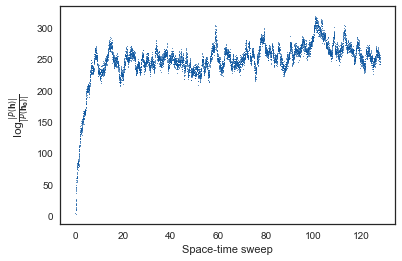

In [4]:
plt.scatter(latSweeps / L, weights, s = 0.3) #show time in space-time sweeps
plt.xlabel(r"Space-time sweep")
plt.ylabel(r'$\log \frac{| P(\mathbf{h}) | }{ | P(\mathbf{h_0}) | } $')
if SAVEPLOTS == True:
    plt.savefig(plotDir + '/Log-weights.png', dpi = 600)

# Spin correlations

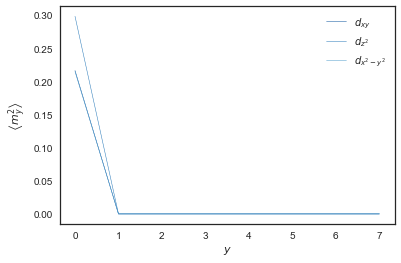

In [23]:
SiaSjb = np.loadtxt(simDir + '/EqTimeSzCorrelations.csv')
mSq = np.diag(SiaSjb)
nOrb = 3
nx = int(NSITES / nOrb / ny)

mSqdz2 = np.zeros(ny)
mSqdxy = np.zeros(ny)
mSqdx2y2 = np.zeros(ny)

j = 0

for i in range(int(NSITES / nOrb)):
    mSqdz2[j] += mSq[3 * i]
    mSqdxy[j] += mSq[3 * i + 1]
    mSqdx2y2[j] += mSq[3 * i + 2]
    if (j+1) % nx == 0:
        j += 1

plt.plot(mSqdxy/(nx**2), label = r'$d_{xy}$', linewidth = 0.5)
plt.plot(mSqdz2/(nx**2), label = r'$d_{z^2}$', linewidth = 0.5)
plt.plot(mSqdx2y2/(nx**2), label = r'$d_{x^2-y^2}$', linewidth = 0.5)
plt.legend()
plt.xlabel(r'$y$')
plt.ylabel(r'$\left\langle m_y^2 \right\rangle$')
plt.savefig("Preliminary.png", dpi = 600)